# One-dimensional Schrodinger's Equation

### Run this code to set up the hamiltonian

In [1]:
import numpy as np
import scipy.sparse


def hamiltonian(N, dx, V=None):
    """Returns Hamiltonian using finite differences.

    Args:
        N (int): Number of grid points.
        dx (float): Grid spacing.
        V (array-like): Potential. Must have shape (N,).
            Default is a zero potential everywhere.

    Returns:
        Hamiltonian as a sparse matrix with shape (N, N).
    """
    L = scipy.sparse.diags([1, -2, 1], offsets=[-1, 0, 1], shape=(N, N))
    H = -L / (2 * dx**2)
    if V is not None:
        H += scipy.sparse.spdiags(V, 0, N, N)
    return H.tocsc()

In [2]:
import scipy.linalg


def time_evolution_operator(H, dt):
    """Time evolution operator given a Hamiltonian and time step."""
    U = scipy.linalg.expm(-1j * H * dt).toarray()
    U[(U.real**2 + U.imag**2) < 1E-10] = 0
    return scipy.sparse.csc_matrix(U)


def simulate(psi, H, dt):
    """Generates wavefunction and time at the next time step."""
    U = time_evolution_operator(H, dt)
    t = 0
    while True:
        yield psi, t * dt
        psi = U @ psi
        t += 1

In [4]:
def probability_density(psi):
    """Position-space probability density."""
    return psi.real**2 + psi.imag**2

In [5]:
def gaussian_wavepacket(x, x0, sigma0, p0):
    """Gaussian wavepacket at x0 +/- sigma0, with average momentum, p0."""
    A = (2 * np.pi * sigma0**2)**(-0.25)
    return A * np.exp(1j*p0*x - ((x - x0)/(2 * sigma0))**2)

In [13]:
N = 1800
x, dx = np.linspace(-25, 155, N, endpoint=False, retstep=True)

psi0 = gaussian_wavepacket(x, x0=0.0, sigma0=5.0, p0=1.0)
H = hamiltonian(N, dx)

### Animation libraries

In [61]:
# Enable interactive plot
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# define the animation routine
def animate(psi0, H, dt):
    fig, ax = plt.subplots(figsize=(8, 4.5))
    line, = ax.plot([])     # A tuple unpacking to unpack the only plot
    ax.set_xlim(-20, 140)
    ax.set_ylim(0, 0.1)
    
    sim = simulate(psi0, H, dt)
    
    def _frame(frame_num):
        y = probability_density(next(sim)[0])
        line.set_data((x, y))
        return line
    
    anim = FuncAnimation(fig, _frame, frames=1, interval=20, repeat=True)
    plt.show()
    return anim

### Run the code

<IPython.core.display.Javascript object>


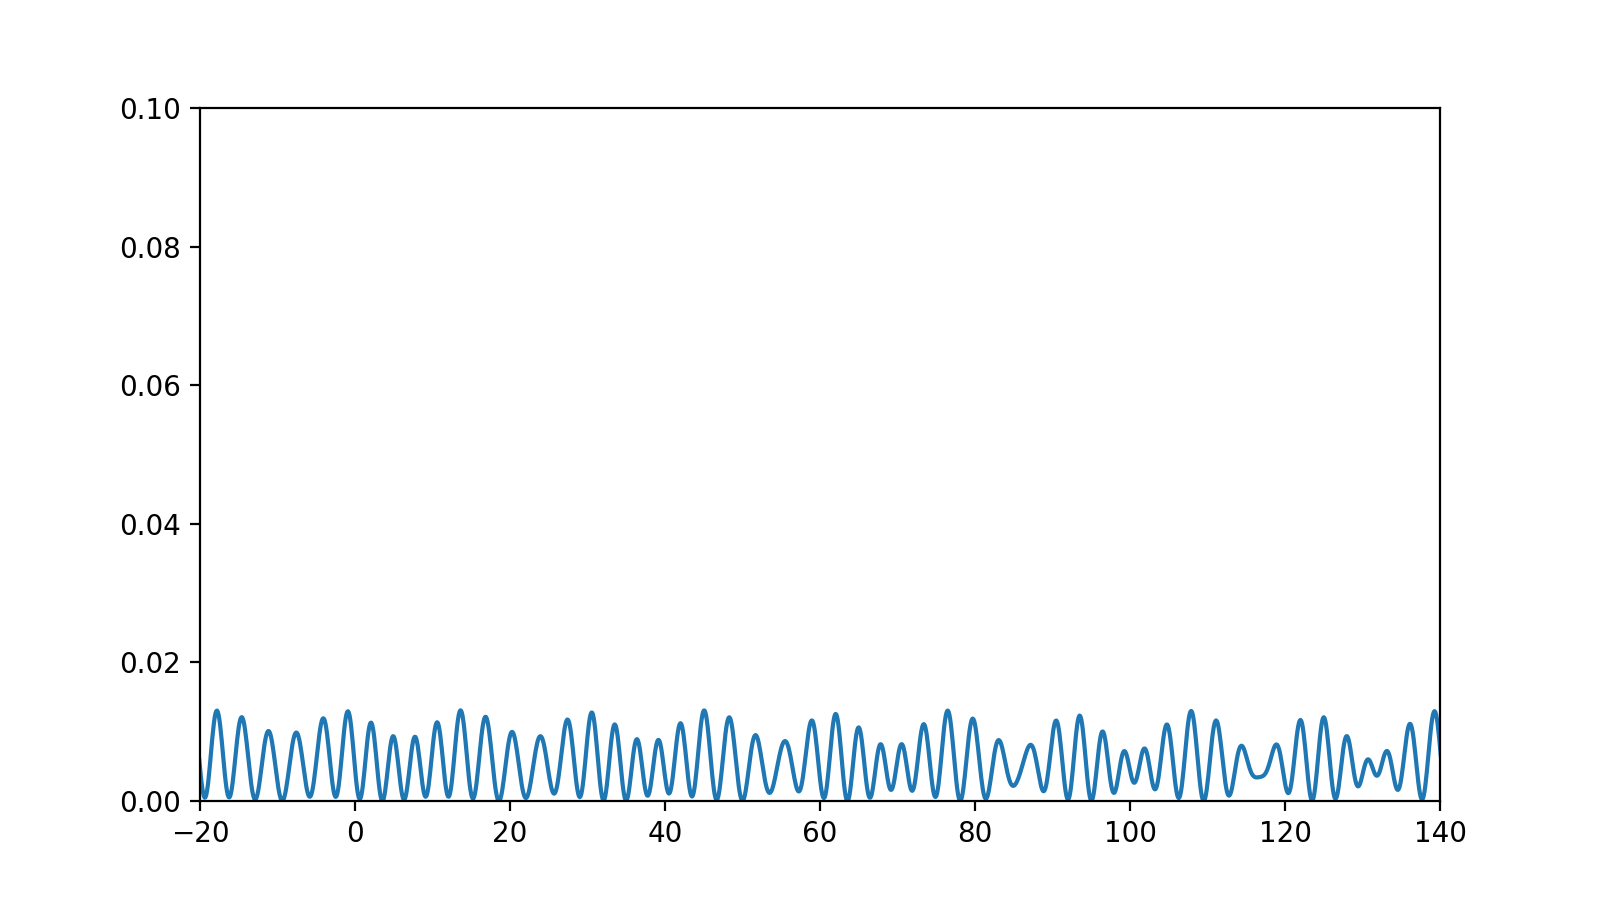

In [62]:
a = animate(psi0, H, dt=1.0)

References:
http://www.astro.utoronto.ca/~mahajan/notebooks/quantum_tunnelling.html
https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389